# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



634

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
row_list = []
record = 0
for x in cities:
    url = 'http://api.openweathermap.org/data/2.5/weather?q='
    key = '&appid='+api_key
    units = '&units=imperial'
    city = x

    json_url = requests.get(url+city+units+key)
    city_weather = json_url.json()
    
    try:
        city = city_weather['name']
        lon = city_weather['coord']['lon']
        lat = city_weather['coord']['lat']
        temp = city_weather['main']['temp_max']
        humidity = city_weather['main']['humidity']
        cloudiness = city_weather['clouds']['all']
        wind_speed = cloudiness = city_weather['wind']['speed']
        date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d')
        record += 1
        print(f'Processing Record {record} of Set 1 | {city}')
    except (KeyError, IndexError, json.decoder.JSONDecodeError):
        print("City not found... skipping.")

    weather_dict ={'city':city,
                   'lon':lon,
                   'lat':lat,
                   'temp':temp,
                   'humidity':humidity,
                   'cloudiness':cloudiness,
                   'wind_speed':wind_speed,
                   'date':date}

    row_list.append(weather_dict)

Processing Record 1 of Set 1 | Mayumba
Processing Record 2 of Set 1 | Ponta Delgada
Processing Record 3 of Set 1 | Mataura
Processing Record 4 of Set 1 | Kodiak
Processing Record 5 of Set 1 | Ambon
Processing Record 6 of Set 1 | Harnosand
Processing Record 7 of Set 1 | Makaryev
Processing Record 8 of Set 1 | Khatanga
City not found... skipping.
Processing Record 9 of Set 1 | Kazanlak
Processing Record 10 of Set 1 | Strelka
Processing Record 11 of Set 1 | Tasiilaq
Processing Record 12 of Set 1 | Rikitea
Processing Record 13 of Set 1 | Berlevag
Processing Record 14 of Set 1 | Itoman
Processing Record 15 of Set 1 | Busselton
Processing Record 16 of Set 1 | Bonavista
Processing Record 17 of Set 1 | Cidreira
Processing Record 18 of Set 1 | Kapaa
Processing Record 19 of Set 1 | Carnarvon
Processing Record 20 of Set 1 | Ushuaia
Processing Record 21 of Set 1 | Arraial do Cabo
Processing Record 22 of Set 1 | Bluff
Processing Record 23 of Set 1 | Ewa Beach
Processing Record 24 of Set 1 | Cape To

Processing Record 180 of Set 1 | Beringovskiy
Processing Record 181 of Set 1 | Esperance
Processing Record 182 of Set 1 | Porto Novo
City not found... skipping.
Processing Record 183 of Set 1 | Bunia
Processing Record 184 of Set 1 | Codrington
Processing Record 185 of Set 1 | Chernyshkovskiy
Processing Record 186 of Set 1 | Avera
Processing Record 187 of Set 1 | Kendari
Processing Record 188 of Set 1 | Takapau
Processing Record 189 of Set 1 | Rio Branco
Processing Record 190 of Set 1 | Fort-Shevchenko
Processing Record 191 of Set 1 | Villarrobledo
Processing Record 192 of Set 1 | Te Anau
Processing Record 193 of Set 1 | Sovetskaya
Processing Record 194 of Set 1 | Galle
Processing Record 195 of Set 1 | Aykhal
Processing Record 196 of Set 1 | Ciudad Bolivar
Processing Record 197 of Set 1 | Constitucion
Processing Record 198 of Set 1 | Dudinka
Processing Record 199 of Set 1 | Naze
Processing Record 200 of Set 1 | Cockburn Town
Processing Record 201 of Set 1 | Padang
City not found... skip

Processing Record 357 of Set 1 | Baneh
Processing Record 358 of Set 1 | Liuhe
Processing Record 359 of Set 1 | Broome
City not found... skipping.
Processing Record 360 of Set 1 | Kaniama
Processing Record 361 of Set 1 | Tupik
Processing Record 362 of Set 1 | Merauke
Processing Record 363 of Set 1 | Aklavik
Processing Record 364 of Set 1 | Wewak
Processing Record 365 of Set 1 | Zhigansk
City not found... skipping.
Processing Record 366 of Set 1 | Villafranca de los Barros
Processing Record 367 of Set 1 | Khuzhir
Processing Record 368 of Set 1 | Henties Bay
City not found... skipping.
Processing Record 369 of Set 1 | Dunn
Processing Record 370 of Set 1 | Traverse City
City not found... skipping.
Processing Record 371 of Set 1 | Tchibanga
Processing Record 372 of Set 1 | Saint-Francois
Processing Record 373 of Set 1 | Pokhara
Processing Record 374 of Set 1 | The Pas
Processing Record 375 of Set 1 | Rincon
Processing Record 376 of Set 1 | Port Macquarie
Processing Record 377 of Set 1 | Cam

Processing Record 536 of Set 1 | Mbandaka
Processing Record 537 of Set 1 | Tarabuco
Processing Record 538 of Set 1 | Kachug
Processing Record 539 of Set 1 | Severomuysk
Processing Record 540 of Set 1 | Ankazoabo
Processing Record 541 of Set 1 | Galveston
Processing Record 542 of Set 1 | Vilhena
Processing Record 543 of Set 1 | Seguin
Processing Record 544 of Set 1 | Kokkola
Processing Record 545 of Set 1 | Jumla
City not found... skipping.
Processing Record 546 of Set 1 | North Branch
Processing Record 547 of Set 1 | Japura
Processing Record 548 of Set 1 | Pisco
City not found... skipping.
Processing Record 549 of Set 1 | Nanning
Processing Record 550 of Set 1 | Kobryn
City not found... skipping.
Processing Record 551 of Set 1 | Goba
Processing Record 552 of Set 1 | Marshall
Processing Record 553 of Set 1 | Encrucijada
City not found... skipping.
Processing Record 554 of Set 1 | Rognan
Processing Record 555 of Set 1 | Lahat
Processing Record 556 of Set 1 | Lusambo
Processing Record 557

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df_weather = pd.DataFrame(row_list)
df_weather.head()

,city,cloudiness,date,humidity,lat,lon,temp,wind_speed
0,Mayumba,3.94,2018-09-24,96,-3.44,10.65,75.42,3.94
1,Ponta Delgada,13.87,2018-09-24,64,37.73,-25.67,75.20,13.87
2,Mataura,12.21,2018-09-24,80,-46.19,168.86,41.76,12.21
3,Kodiak,10.29,2018-09-24,62,39.95,-94.76,78.08,10.29
4,Ambon,5.82,2018-09-24,58,47.55,-2.56,53.60,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

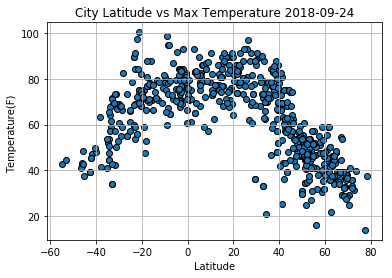

In [8]:
x = df_weather['lat']
y = df_weather['temp']
date = df_weather['date'][0]
plt.title('City Latitude vs Max Temperature '+ date )
plt.ylabel('Temperature(F)')
plt.xlabel('Latitude')
plt.grid(True)

plt.scatter(x,y,edgecolor='black')


#### Latitude vs. Humidity Plot

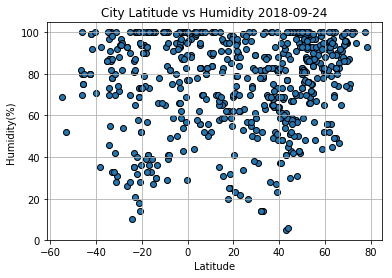

In [10]:
x = df_weather['lat']
y = df_weather['humidity']
date = df_weather['date'][0]
plt.title('City Latitude vs Humidity '+ date )
plt.ylabel('Humidity(%) ')
plt.xlabel('Latitude')
plt.grid(True)

plt.scatter(x,y,edgecolor='black')

#### Latitude vs. Cloudiness Plot

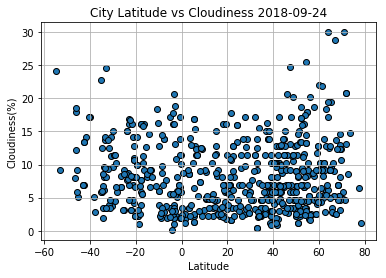

In [11]:
x = df_weather['lat']
y = df_weather['cloudiness']
date = df_weather['date'][0]
plt.title('City Latitude vs Cloudiness '+ date )
plt.ylabel('Cloudiness(%)')
plt.xlabel('Latitude')
plt.grid(True)

plt.scatter(x,y,edgecolor='black')

#### Latitude vs. Wind Speed Plot

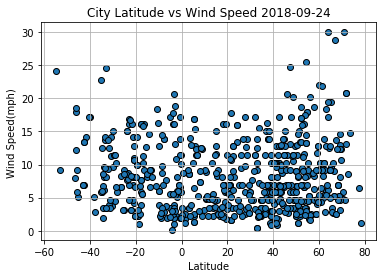

In [12]:
x = df_weather['lat']
y = df_weather['wind_speed']
date = df_weather['date'][0]
plt.title('City Latitude vs Wind Speed '+ date )
plt.ylabel('Wind Speed(mph) ')
plt.xlabel('Latitude')
plt.grid(True)

plt.scatter(x,y,edgecolor='black')